In [123]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
from sklearn.linear_model import LinearRegression
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
#import seaborn as sns; sns.set_theme(color_codes=True)
import math

import numpy as np
import matplotlib.pyplot as plt
#New import statement
import scipy.optimize as fitter
from pandas import DataFrame
import csv
#import carmcmc as cm
print("X")


X


In [124]:
# for each object
# Read an object's file
# Seperate Data Pts by Filter
# For each filter:
# init output array (filter_output_array_<color>) for this filter
# Sort ALL data pts by time (least to greatest)
# For each batch of n(19) points
# Pick first n) pts find Time Median.
# Sort n pts by mag of the specific filter
# Record Time and Mag Median into Tuple/Dictionary and append this to filter_output_array_<color>
# Here we will have filter_output_array_red, filter_output_array_infra ...
os.chdir("/Users/ArjunShrivastava/School/SIP/Astronomy Notebooks/Astronomy SIP Projects/AstronomyLab/Moving Median Model /full")
my_files = glob.glob('*[0-10].mjdmag')
#print(my_files[9])
ranger = 500 #This dictates the number of objects
uOutput = [[] for i in range(ranger)] 
gOutput = [[] for i in range(ranger)]
rOutput = [[] for i in range(ranger)]
iOutput = [[] for i in range(ranger)]
i2Output = [[] for i in range(ranger)]
zOutput = [[] for i in range(ranger)]
"""These 2D lists contain the raw data for each filter"""


u_timeMedian = [[] for i in range(ranger)]
g_timeMedian = [[] for i in range(ranger)]
r_timeMedian =[[] for i in range(ranger)]
i_timeMedian = [[] for i in range(ranger)]
i2_timeMedian = [[] for i in range(ranger)]
z_timeMedian = [[] for i in range(ranger)]

"""There are lists inside these lists, and each inner list contains a tuple of the median time and median magnitude"""


timeAxisU = [[] for i in range(ranger)]
magAxisU = [[] for i in range(ranger)]

timeAxisG = [[] for i in range(ranger)]
magAxisG = [[] for i in range(ranger)]

timeAxisR = [[] for i in range(ranger)]
magAxisR = [[] for i in range(ranger)]

timeAxisI = [[] for i in range(ranger)]
magAxisI = [[] for i in range(ranger)]

timeAxisI2 = [[] for i in range(ranger)]
magAxisI2 = [[] for i in range(ranger)]

timeAxisZ = [[] for i in range(ranger)]
magAxisZ = [[] for i in range(ranger)]

"""The lists contain data to put in the moving median plots"""

U_RMS = []
G_RMS = []
R_RMS = []
I_RMS = []
I2_RMS = []
Z_RMS = []

"""These lists contain data for Standard Deviation (RMS Deviation) of the magnitude of every object
in a given filter."""
U_M = []
G_M = []
R_M = []
I_M = []
I2_M = []
Z_M = []
"""These lists contain data for the median of the magnitude of every object in a given filter"""

#This is where we initialize all the arrays/lists to contain data

'These lists contain data for the median of the magnitude of every object in a given filter'

In [125]:
D1evar = ["CFHTLS-VAR-J022459.67-041703.2",
"CFHTLS-VAR-J022735.05-043724.6",
"CFHTLS-VAR-J022735.05-043724.6",
"CFHTLS-VAR-J022710.09-044359.7",
"CFHTLS-VAR-J022625.76-042931.1", 
"CFHTLS-VAR-J022501.25-040806.7", 
"CFHTLS-VAR-J022700.57-045818.0", 
"CFHTLS-VAR-J022745.99-040653.1" ,
"CFHTLS-VAR-J022541.63-045849.5" ,
"CFHTLS-VAR-J022730.07-043815.4" ,
"CFHTLS-VAR-J022549.45-045502.7" ,
"CFHTLS-VAR-J022401.35-042537.5" ,
"CFHTLS-VAR-J022524.59-041147.8",
"CFHTLS-VAR-J022627.57-042416.0" ,
"CFHTLS-VAR-J022505.63-044530.4" ,
"CFHTLS-VAR-J022425.99-043947.3" ,
"CFHTLS-VAR-J022552.74-040519.2" ,
"CFHTLS-VAR-J022638.10-041513.9" ,
"CFHTLS-VAR-J022746.46-040100.6" ,
"CFHTLS-VAR-J022540.45-045150.9" ,
"CFHTLS-VAR-J022431.97-042936.1" ,
"CFHTLS-VAR-J022554.19-045028.5" ,
"CFHTLS-VAR-J022507.80-040011.4",
"CFHTLS-VAR-J022438.04-045914.7" ,
"CFHTLS-VAR-J022508.81-043800.7" ,
"CFHTLS-VAR-J022715.47-042540.2" ,
"CFHTLS-VAR-J022750.93-042524.1" ,
"CFHTLS-VAR-J022504.74-042222.5" ,
"CFHTLS-VAR-J022732.70-040551.7" ,
"CFHTLS-VAR-J022657.24-043356.7" ,
"CFHTLS-VAR-J022758.77-043154.4",
"CFHTLS-VAR-J022547.46-040938.1" ,
"CFHTLS-VAR-J022454.73-042554.9" ,
"CFHTLS-VAR-J022618.19-042631.7" ,
"CFHTLS-VAR-J022738.06-040524.8" ,
"CFHTLS-VAR-J022655.17-044517.7" ,
"CFHTLS-VAR-J022651.17-045745.7",
"CFHTLS-VAR-J022527.53-035954.4" ,
"CFHTLS-VAR-J022721.99-041757.8" ,
"CFHTLS-VAR-J022456.68-041334.0" ,
"CFHTLS-VAR-J022738.78-042000.2" ,
"CFHTLS-VAR-J022427.06-044428.8" ,
"CFHTLS-VAR-J022413.27-042230.8" ,
"CFHTLS-VAR-J022647.44-040826.7"]
DExtra = ["CFHTLS-VAR-J022451.91-043221.4",
"CFHTLS-VAR-J022755.02-043034.1",
"CFHTLS-VAR-J022505.57-044734.9",
"CFHTLS-VAR-J022710.84-044953.1",
"CFHTLS-VAR-J022524.13-043648.4",
"CFHTLS-VAR-J022408.11-043018.7",
"CFHTLS-VAR-J022725.79-040510.7",
"CFHTLS-VAR-J022422.51-044155.1",
"CFHTLS-VAR-J022755.65-040533.7",
"CFHTLS-VAR-J022633.71-044635.3",
"CFHTLS-VAR-J022459.92-043956.1",
"CFHTLS-VAR-J022554.57-041238.4",
"CFHTLS-VAR-J022720.89-040303.8",
"CFHTLS-VAR-J022757.97-035955.2",
"CFHTLS-VAR-J022717.75-042244.2",
"CFHTLS-VAR-J022410.46-044955.0",
"CFHTLS-VAR-J022644.04-045715.3",
"CFHTLS-VAR-J022712.78-045717.7",
"CFHTLS-VAR-J022700.77-041833.1",
"CFHTLS-VAR-J022449.87-043025.9",
"CFHTLS-VAR-J022645.35-041101.8",
"CFHTLS-VAR-J022720.23-045940.3",
"CFHTLS-VAR-J022723.80-045141.0",
"CFHTLS-VAR-J022705.17-040715.1",
"CFHTLS-VAR-J022607.76-041842.8",
"CFHTLS-VAR-J022659.32-040551.7",
"CFHTLS-VAR-J022554.78-045046.7",
"CFHTLS-VAR-J022515.74-045958.7",
"CFHTLS-VAR-J022524.66-040208.2",
"CFHTLS-VAR-J022709.36-044241.6",
"CFHTLS-VAR-J095835.85+014504.2",]
D1evar2 = []
for i in DExtra:
    i = i + ".mjdmag"
    D1evar2.append(i)


for i in D1evar2:
    #print(i)
    f = open(i)
    print(f.readlines()[1])



# RA,Dec: 036.1007242 -04.5415899

# RA,Dec: 036.1352977 -04.5103125

# RA,Dec: 036.1372241 -04.7950534

# RA,Dec: 036.1579761 -04.8340361

# RA,Dec: 036.1696661 -04.6160129

# RA,Dec: 036.2077809 -04.5071984

# RA,Dec: 036.2174882 -04.0887243

# RA,Dec: 036.2465125 -04.6979255

# RA,Dec: 036.2633554 -04.0942565

# RA,Dec: 036.3099281 -04.7833808

# RA,Dec: 036.3139513 -04.6691437

# RA,Dec: 036.3364915 -04.2129792

# RA,Dec: 036.3604660 -04.0514285

# RA,Dec: 036.3647192 -03.9984548

# RA,Dec: 036.4674077 -04.3801466

# RA,Dec: 036.4900729 -04.8348078

# RA,Dec: 036.4918669 -04.9557687

# RA,Dec: 036.5280810 -04.9564785

# RA,Dec: 036.5323412 -04.3118966

# RA,Dec: 036.5729331 -04.5081750

# RA,Dec: 036.5774831 -04.1836260

# RA,Dec: 036.5869219 -04.9962703

# RA,Dec: 036.6325459 -04.8576535

# RA,Dec: 036.6843243 -04.1222556

# RA,Dec: 036.6957761 -04.3105794

# RA,Dec: 036.7172007 -04.0991709

# RA,Dec: 036.7991806 -04.8438752

# RA,Dec: 036.8188318 -05.0023411

# RA,Dec: 036.849147

In [126]:
def is_space(e):
    # This function removes the spaces in each line in the objectFile array.
    return e != ''

count = 0
def read_one_object(filepath, index):
    # This function reads data file for a specific object returns the data for the specfied filters.

    #print(filepath)
    objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
    # Here we get all the data from a single file. The delimeter gives the criteria of how the data is seperated in the array.
    

    # Initialized lists where we put the MDJ and Magnitude.

    for line in objectFile:
        #         print("Line :", line)
        x = line.split(" ")
        #         print(x)
        x = list(filter(is_space, x))
        # print(x[0], x[1], x[8])
        # Using split and filter, we remove all the spaces in a single line so there are no indexs where there are spaces.

        data = (float(x[0]), float(x[1]))
        #print(data)

        if (x[8] == 'U'):
            uOutput[index].append(data)

        elif (x[8] == 'G'):
            gOutput[index].append(data)
        elif (x[8] == 'R'):
            rOutput[index].append(data)

        elif (x[8] == 'I'):
            iOutput[index].append(data)

        elif (x[8] == 'I2'):
            i2Output[index].append(data)
        elif (x[8] == 'Z'):
            zOutput[index].append(data)
            # This for loop appends the data from x (each line) and appends it to the specified filter array


    return uOutput[index], gOutput[index], rOutput[index], iOutput[index], i2Output[index], zOutput[index]
"""This for loop calls the file reading function multiple times to 
append all the data for each object."""
r = True
for i in range(ranger): 
    
    if((i == 0) and r == True):
        if(i == 0):
            print("1")
            uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = read_one_object('CFHTLS-VAR-J022501.11-042316.7.mjdmag', i)
    
    else:
        #ind = random.randrange(0, 1000, 1)
        uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = read_one_object(my_files[i], i)
     
          
#print(uOutput, len(uOutput[0]) + len(gOutput[0]) + len(rOutput[0])+ len(iOutput[0]) + len(i2Output[0]) + len(zOutput[0]))


1


/var/folders/vy/fstp4tbs7dd88v7rpr4cj9z00000gp/T/ipykernel_10668/3393402788.py:10: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J141717.77+531202.0.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)


In [127]:
def key_func(t):
    return t[1]
t = [(0,4),(3,6), (1,3),(-1,4)]
u = sorted(t,key=key_func)


def time_func(filterType):
    return t[0]
#We specify to sort only the MJD's in the tuples.


# Array of time medians and mag medians.
filterID = ""


def sorter(filterType, filterID, index):
    # print("x", filterID)
    # if(filterID == uOutput):
    #  filterID == "uOutput"
    #     if(filterID == gOutput):
    #
    # filterID == "gOutput"
    #     if(filterID == rOutput):
    #          filterID == "rOutput"
    #     if(filterID == iOutput):
    #          filterID == "iOutput"
    #     if(filterID == i2Output):
    #          filterID == "i2Output"
    #     if(filterID == zOutput):
    #          filterID == "zOutput"

    filterSORTED = sorted(filterType, key=time_func)
    # print(filterSORTED)
    return MedMaker(filterSORTED, filterID, index)

# Call the sorting funtion to order the tuples in the list by time.
# print(uOutputSORTED)
# uOutputSORTED contains the list where the tuples are organized by time.
def mag_func(filterType):
    return t[1]


# Sorting function to sort the tuples by magnitude in the U list.


def MedMaker(filterSORTED, filterID, index):
   # print("x", filterID)

    start = 0
    end = 18
    med = 9
   # print(filterID)
    while (end < len(filterSORTED)):

        # Allows us to record the median values.
        # print(med)
        # print(uOutputSORTED[med][0], med)
        timeMed = filterSORTED[med][0]
        # We put the index of the median into the sorted time array to get the median value.

        tempArray = filterSORTED[start:end + 1]
        # Temporarily, we put the the current the mangitudes 19 points of time in this run of the loop into an array.
        # The start and end keep appending to make it a moving median.
        tempArraySORTED = sorted(tempArray, key=mag_func)

        if (filterID == "uOutput"):
            # print(True)
            u_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return u_timeMedian

        if (filterID == "gOutput"):
            g_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return g_timeMedian

        if (filterID == "rOutput"):
            r_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return r_timeMedian

        if (filterID == "iOutput"):
            i_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i_timeMedian

        if (filterID == "i2Output"):
            i2_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i2_timeMedian

        if (filterID == "zOutput"):
            z_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return z_timeMedian

        start += 1
        med += 1
        end += 1
#This cell takes care of proccesing the moving medians and appending them to lists 

In [128]:
def collectMedians():
    """This function calls the functions above to exceute the moving median procces """
    for i in range(ranger):
        sorter(uOutput[i], "uOutput", i)
        sorter(gOutput[i], "gOutput", i)
        sorter(rOutput[i], "rOutput", i)
        sorter(iOutput[i], "iOutput", i)
        sorter(i2Output[i], "i2Output", i)
        sorter(zOutput[i], "zOutput", i)

collectMedians()



In [129]:



def coList(ind):
    for t in u_timeMedian[ind]:
        timeAxisU[ind].append(t[0])
        magAxisU[ind].append(t[1])
    for t in g_timeMedian[ind]:
        timeAxisG[ind].append(t[0])
        magAxisG[ind].append(t[1])

    for t in r_timeMedian[ind]:
        timeAxisR[ind].append(t[0])
        magAxisR[ind].append(t[1])
    for t in i_timeMedian[ind]:
        timeAxisI[ind].append(t[0])
        magAxisI[ind].append(t[1])
    for t in i2_timeMedian[ind]:
        timeAxisI2[ind].append(t[0])
        magAxisI2[ind].append(t[1])
    for t in z_timeMedian[ind]:
        timeAxisZ[ind].append(t[0])
        magAxisZ[ind].append(t[1])

for i in range(ranger):
    coList(i)
"""We append the median data into different lists so we can plot the moving medians"""

'We append the median data into different lists so we can plot the moving medians'

In [130]:
#



origUTime = [[] for i in range(ranger)]
origUMag = [[] for i in range(ranger)]

origGTime = [[] for i in range(ranger)]
origGMag = [[] for i in range(ranger)]

origRTime = [[] for i in range(ranger)]
origRMag = [[] for i in range(ranger)]

origITime = [[] for i in range(ranger)]
origIMag = [[] for i in range(ranger)]

origI2Time = [[] for i in range(ranger)]
origI2Mag= [[] for i in range(ranger)]

origZTime = [[] for i in range(ranger)]
origZMag = [[] for i in range(ranger)]
"""These lists are initilized to split the raw time and magnitude so we can plot them"""
for tup in uOutput[0]:
    origUTime[0].append(tup[0])
    origUMag[1].append(tup[1])
for tup in gOutput[0]:
    origGTime[0].append(tup[0])
    origGMag[1].append(tup[1])
for tup in rOutput[0]:
    origRTime[0].append(tup[0])
    origRMag[1].append(tup[1])
for tup in iOutput[0]:
    origITime[0].append(tup[0])
    origIMag[1].append(tup[1])
for tup in i2Output[0]:
    origI2Time[0].append(tup[0])
    origI2Mag[1].append(tup[1])
for tup in zOutput[0]:
    origZTime[0].append(tup[0])
    origZMag[1].append(tup[1])
"""We then procced to append to these lists"""
    
"""
plt.ylim(23, 18)
plt.scatter(origUTime[0], origUMag[1],  c='blue', edgecolors='none', s=2 )
plt.scatter(origGTime[0], origGMag[1],  c='green', edgecolors='none', s=2 )
plt.scatter(origRTime[0], origRMag[1],  c='purple', edgecolors='none', s=2 )
plt.scatter(origITime[0], origIMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origUTime[0], origUMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origZTime[0], origZMag[1],  c='red', edgecolors='none', s=2)
plt.plot(timeAxisU[0], magAxisU[0], c='blue')
plt.plot(timeAxisG[0], magAxisG[0], c='green')
plt.plot(timeAxisR[0], magAxisR[0], c='purple')
plt.plot(timeAxisI[0], magAxisI[0], c='gold')
plt.plot(timeAxisI2[0], magAxisI2[0], c='gold')
plt.plot(timeAxisZ[0], magAxisZ[0], c='red')

"""
#Above is the commented out moving median plots

"""axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)



axis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisZ[1], magAxisZ[1], c='black', edgecolors='none', s=2)



axis[0,2].scatter(timeAxisU[2], magAxisU[2], c='blue', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisG[2], magAxisG[2], c='green', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisR[2], magAxisR[2], c='red', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI[2], magAxisI[2], c='magenta', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI2[2], magAxisI2[2], c='brown', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisZ[2], magAxisZ[2], c='black', edgecolors='none', s=2)



axis[0,3].scatter(timeAxisU[3], magAxisU[3], c='blue', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisG[3], magAxisG[3], c='green', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisR[3], magAxisR[3], c='red', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI[3], magAxisI[3], c='magenta', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI2[3], magAxisI2[3], c='brown', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisZ[3], magAxisZ[3], c='black', edgecolors='none', s=2)

axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='blue', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='green', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='red', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='magenta', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='brown', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='black', edgecolors='none', s=2)


axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='blue', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5],c='green', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='red', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='magenta', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='brown', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='black', edgecolors='none', s=2)

axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='blue', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='green', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='red', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='magenta', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='brown', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='black', edgecolors='none', s=2)

print(timeAxisU[6], magAxisU[6])
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='blue', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='green', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='red', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='magenta', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='brown', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='black', edgecolors='none', s=2)


axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='blue', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='green', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='red', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='magenta', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='brown', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='black', edgecolors='none', s=2)

axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='blue', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='green', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='red', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='magenta', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='brown', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='black', edgecolors='none', s=2)

axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='blue', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='green', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='red', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='magenta', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='brown', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='black', edgecolors='none', s=2)

axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='blue', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='green', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='red', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='magenta', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='brown', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='black', edgecolors='none', s=2)

axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='blue', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='green', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='red', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='magenta', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='brown', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='black', edgecolors='none', s=2)

axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='blue', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='green', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='red', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='magenta', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='brown', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='black', edgecolors='none', s=2)

axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='blue', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='green', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='red', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='magenta', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='brown', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='black', edgecolors='none', s=2)

axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='blue', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='green', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='red', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='magenta', edgecolors='none', s=2)
axis[3,3].scatter(timeAxisU[15], magAxisU[15], c='brown', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='black', edgecolors='none', s=2)"""

#Above is the code to generate multiple moving median plots 

"axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)\n\n\n\naxis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)\naxis[0,1].scatter(ti

In [131]:




#fig, axis = plt.subplots(2, 2)




"""def RMSCalc(mags, filter):
    magArray = np.array(mags)
    mean_square_mag = np.mean(magArray*magArray)

    return np.sqrt(mean_square_mag)"""

def RMSArray(U, G, R, I, I2, Z):

    for i in U:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))
        if(i == []):
            #print(True)
            continue
        else:
            #print(i)
            U_M.append(np.median(i))
            #x = RMSCalc(i, "U")
            #U_RMS.append(abs(x**2 - np.mean(i)**2))

            U_RMS.append(np.std(i))
    for i in G:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))
        if(i == []):
            #print(True)
            continue
        else:
            #y = RMSCalc(i, "G")
            G_M.append(np.median(i))
            G_RMS.append(np.std(i))
    for i in R:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))
        if(i == []):
            continue
            #print(True)
        else:

            R_M.append(np.median(i))
            R_RMS.append(np.std(i))


RMSArray(magAxisU, magAxisG, magAxisR, magAxisI, magAxisI2, magAxisZ) ##Call the function 



In [132]:
U_M2 = []

G_M2 = []

R_M2 = []

R_RMS2 = []

G_RMS2 = []

U_RMS2 = []

U_logRMS = np.log10(U_RMS)
R_logRMS = np.log10(R_RMS)
G_logRMS = np.log10(G_RMS)
#This is to linearize the Stand Dev vs Median Graph 


"""
poly = PolynomialFeatures(degree=3, include_bias=False)
U_M = np.array(U_M)

U_M2 = poly.fit_transform(U_M.reshape(-1, 1))

G_M = np.array(G_M)
G_M2 = poly.fit_transform(G_M.reshape(-1, 1))

R_M = np.array(R_M)
R_M2 = poly.fit_transform(R_M.reshape(-1, 1))

np.nan_to_num(G_M, neginf=0)
np.nan_to_num(G_RMS, neginf=0)

np.nan_to_num(R_M, neginf=0)
np.nan_to_num(R_RMS, neginf=0)"""



#This is for the regression

/var/folders/vy/fstp4tbs7dd88v7rpr4cj9z00000gp/T/ipykernel_10668/4002601239.py:13: RuntimeWarning: divide by zero encountered in log10
  U_logRMS = np.log10(U_RMS)


'\npoly = PolynomialFeatures(degree=3, include_bias=False)\nU_M = np.array(U_M)\n\nU_M2 = poly.fit_transform(U_M.reshape(-1, 1))\n\nG_M = np.array(G_M)\nG_M2 = poly.fit_transform(G_M.reshape(-1, 1))\n\nR_M = np.array(R_M)\nR_M2 = poly.fit_transform(R_M.reshape(-1, 1))\n\nnp.nan_to_num(G_M, neginf=0)\nnp.nan_to_num(G_RMS, neginf=0)\n\nnp.nan_to_num(R_M, neginf=0)\nnp.nan_to_num(R_RMS, neginf=0)'

In [133]:
"""#plt.subplot(3, 1, 3)
plt.scatter(U_M, U_logRMS,c='blue', edgecolors='none', s=2)
#plt.xlim(16, 36)
#plt.ylim(-5, 1)
plt.ylabel('log RMS')
plt.xlabel('Median UMag')


#plt.scatter(G_M, G_RMS, c='green', edgecolors='none', s=9)
#plt.scatter(R_M, R_RMS, c='magenta', edgecolors='none', s=9)
#plt.scatter(I_M, I_RMS, c='gold', edgecolors='none', s=2)
#plt.scatter(I2_M, I2_RMS, c='gold', edgecolors='none', s=2)
#plt.scatter(Z_M, Z_RMS, c='red', edgecolors='none', s=2)

plt.show()"""



"#plt.subplot(3, 1, 3)\nplt.scatter(U_M, U_logRMS,c='blue', edgecolors='none', s=2)\n#plt.xlim(16, 36)\n#plt.ylim(-5, 1)\nplt.ylabel('log RMS')\nplt.xlabel('Median UMag')\n\n\n#plt.scatter(G_M, G_RMS, c='green', edgecolors='none', s=9)\n#plt.scatter(R_M, R_RMS, c='magenta', edgecolors='none', s=9)\n#plt.scatter(I_M, I_RMS, c='gold', edgecolors='none', s=2)\n#plt.scatter(I2_M, I2_RMS, c='gold', edgecolors='none', s=2)\n#plt.scatter(Z_M, Z_RMS, c='red', edgecolors='none', s=2)\n\nplt.show()"

In [134]:
"""#plt.subplot(3, 1, 2)
plt.scatter(G_M, G_logRMS,c='green', edgecolors='none', s=2)
#plt.xlim(16, 27)
#plt.ylim(-5, 1)
plt.ylabel('log RMS')
plt.xlabel('Median GMag')
poly_reg_model = LinearRegression()
poly_reg_model.fit(G_M2, G_logRMS)
G_RMS2 = poly_reg_model.predict(G_M2)
plt.scatter(G_M, G_RMS2, s = 1, c='green')

plt.show()"""

"#plt.subplot(3, 1, 2)\nplt.scatter(G_M, G_logRMS,c='green', edgecolors='none', s=2)\n#plt.xlim(16, 27)\n#plt.ylim(-5, 1)\nplt.ylabel('log RMS')\nplt.xlabel('Median GMag')\npoly_reg_model = LinearRegression()\npoly_reg_model.fit(G_M2, G_logRMS)\nG_RMS2 = poly_reg_model.predict(G_M2)\nplt.scatter(G_M, G_RMS2, s = 1, c='green')\n\nplt.show()"

In [135]:
"""#print(R_RMS)
#print(U_M)
plt.ylabel('log RMS')
plt.xlabel('Median RMag')
#plt.subplot(3, 1, 1)
#plt.xlim(16, 36)
#plt.ylim(-5, 1)
plt.scatter(R_M, R_logRMS,c='red', edgecolors='none', s=2)

poly_reg_model = LinearRegression()
poly_reg_model.fit(R_M2, R_logRMS)
R_RMS2 = poly_reg_model.predict(R_M2)
plt.scatter(R_M, R_RMS2, s = 1)

plt.show()"""


"#print(R_RMS)\n#print(U_M)\nplt.ylabel('log RMS')\nplt.xlabel('Median RMag')\n#plt.subplot(3, 1, 1)\n#plt.xlim(16, 36)\n#plt.ylim(-5, 1)\nplt.scatter(R_M, R_logRMS,c='red', edgecolors='none', s=2)\n\npoly_reg_model = LinearRegression()\npoly_reg_model.fit(R_M2, R_logRMS)\nR_RMS2 = poly_reg_model.predict(R_M2)\nplt.scatter(R_M, R_RMS2, s = 1)\n\nplt.show()"

In [136]:
AllData = list(zip(my_files, U_M, U_RMS, U_logRMS, G_M, G_RMS, G_logRMS, R_M, R_RMS, R_logRMS))
df = pd.DataFrame(data = AllData, columns=['Object', 'Median U Mag', 'Median U RMS', 'log Median U RMS', 'Median G Mag', 'Median G RMS', 'log Median G RMS', 'Median R Mag', 'Median R RMS', 'log Median R RMS'])
df


,Object,Median U Mag,Median U RMS,log Median U RMS,Median G Mag,Median G RMS,log Median G RMS,Median R Mag,Median R RMS,log Median R RMS
0,CFHTLS-VAR-J022638.92-042606.1.mjdmag,22.8490,0.569384,-0.244595,22.5010,0.270549,-0.567754,22.4220,0.241092,-0.617817
1,CFHTLS-VAR-J221624.67-174751.1.mjdmag,23.2185,0.380915,-0.419172,23.0730,0.213950,-0.669688,22.7040,0.295951,-0.528780
2,CFHTLS-VAR-J095834.99+021314.1.mjdmag,22.6430,0.374523,-0.426522,22.5720,0.464476,-0.333036,22.6240,0.219382,-0.658800
3,CFHTLS-VAR-J221446.05-172006.0.mjdmag,23.0280,0.402428,-0.395312,22.1475,0.366566,-0.435848,21.6435,0.588812,-0.230023
4,CFHTLS-VAR-J142137.51+521323.1.mjdmag,20.9450,0.037474,-1.426265,20.2610,0.022011,-1.657353,20.0360,0.040383,-1.393803
...,...,...,...,...,...,...,...,...,...,...
467,CFHTLS-VAR-J095956.98+024117.1.mjdmag,25.2650,1.203937,0.080604,17.9530,0.209617,-0.678573,22.1310,0.097421,-1.011347
468,CFHTLS-VAR-J221353.84-173306.0.mjdmag,24.6045,0.998808,-0.000518,23.5135,0.497850,-0.302901,21.9600,0.097934,-1.009067
469,CFHTLS-VAR-J221513.45-174041.1.mjdmag,21.7435,0.499500,-0.301465,23.9300,0.325636,-0.487268,23.7460,0.401611,-0.396195
470,CFHTLS-VAR-J221645.99-174540.0.mjdmag,20.9670,0.063111,-1.199892,23.9280,0.339394,-0.469295,17.4340,0.127592,-0.894177


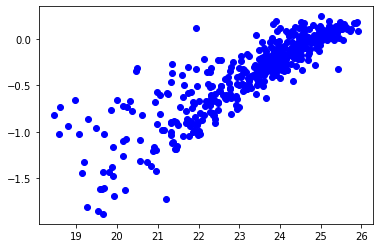

In [150]:
plt.scatter(U_M,  U_logRMS, c = 'b')


bMarginal = []
bIntermediate = []
bExtreme = []


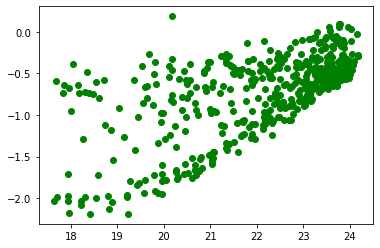

In [152]:
plt.scatter(G_M,G_logRMS, c = 'g')


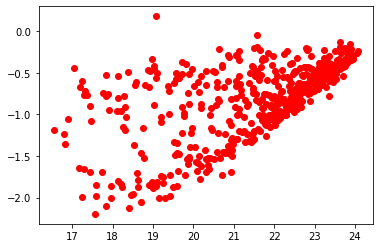

In [153]:
plt.scatter(R_M, R_logRMS, c = 'r')


/Users/ArjunShrivastava/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ArjunShrivastava/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ArjunShrivastava/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ArjunShrivastava/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ArjunShrivastava/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_globa

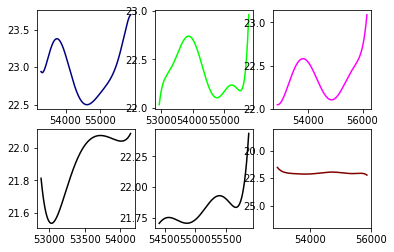

In [149]:
"""def InitializePlot():
    plt.clf()
    f = plt.figure(figsize=(20, 20))


    plt.xlabel('Mean of Magnitudes')
    plt.ylabel('RMS-Median')
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])
f = InitializePlot()"""
figure, axis = plt.subplots(2 ,3)
zUltra = 0
zGreen = 0
zRed = 0
zInf = 0
zInf2 = 0
zFInf = 0
pUltra = 0
pGreen = 0
pRed = 0
pInf = 0
pInf2 = 0
pFInf = 0

if(r == False):
    user2 = random.randrange(0, 100)
else:
    user2 = 0
"""axis[0,0].scatter(timeAxisU[user2], magAxisU[user2], c='blue', s=1, label = "U")
axis[0,1].scatter(timeAxisG[user2], magAxisG[user2], c='green', s=1, label = "G")
axis[0,2].scatter(timeAxisR[user2], magAxisR[user2], c='purple', s=1, label = "R")
axis[1,0].scatter(timeAxisI[user2], magAxisI[user2], c='gold', s=1, label = "I")
axis[1,1].scatter(timeAxisI2[user2], magAxisI2[user2], c='gold', s=1, label = "I2")
axis[1,2].scatter(timeAxisZ[user2], magAxisZ[user2], c='red', s=1, label = "Z")"""

plt.ylim(27, 18)
zUIn = np.arange(min(timeAxisU[user2]), max(timeAxisU[user2]), 1)
zUltra= np.polyfit(timeAxisU[user2], magAxisU[user2], 15)
pUltra = np.poly1d(zUltra)


axis[0,0].plot(zUIn, pUltra(zUIn), c='navy', label = "Regression Ultraviolet")
#plt.scatter(timeAxisU[user2], pUltra(timeAxisU[user2]), c='orange', s=10, label = "Regression Ultraviolet")
#plt.legend(loc=2, prop={'size': 15})

zGIn = np.arange(min(timeAxisG[user2]), max(timeAxisG[user2]), 1)
zGreen= np.polyfit(timeAxisG[user2], magAxisG[user2], 15)
pGreen = np.poly1d(zGreen)
axis[0,1].plot(zGIn, pGreen(zGIn), c='lime', label = "Regression Green")
#plt.legend(loc=2, prop={'size': 15})


zRIn = np.arange(min(timeAxisR[user2]), max(timeAxisR[user2]), 1)
zRed= np.polyfit(timeAxisR[user2], magAxisR[user2], 15)
pRed = np.poly1d(zRed)
axis[0,2].plot(zRIn, pRed(zRIn), c='magenta', label = "Regression Red ")
#plt.legend(loc=2, prop={'size': 15})

ziIn = np.arange(min(timeAxisI[user2]), max(timeAxisI[user2]), 1)
zInf= np.polyfit(timeAxisI[user2], magAxisI[user2], 15)
pInf = np.poly1d(zInf)
axis[1,0].plot(ziIn, pInf(ziIn), c='black',label = "Regression Infrared")
#plt.legend(loc=2, prop={'size': 15})


zi2In = np.arange(min(timeAxisI2[user2]), max(timeAxisI2[user2]), 1)
zInf2= np.polyfit(timeAxisI2[user2], magAxisI2[user2], 15)
pInf2 = np.poly1d(zInf2)
axis[1, 1].plot(zi2In, pInf2(zi2In), c='black')
#plt.legend(loc=2, prop={'size': 15})


zZin = np.arange(min(timeAxisZ[user2]), max(timeAxisZ[user2]), 1)
zFInf= np.polyfit(timeAxisZ[user2], magAxisZ[user2], 15)
pFInf = np.poly1d(zFInf)
axis[1,2].plot(zZin, pFInf(zZin), c='maroon', label = "Regression Z")
#plt.legend(loc=4, prop={'size': 8})


#print(len(p(timeAxisR[user2])), len(magAxisR[user2]))


                                                    
    
    

(16.0, 27.0)

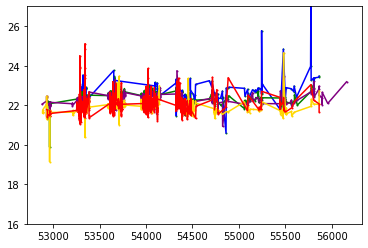

In [141]:
plt.scatter(timeAxisU[user2], magAxisU[user2], c='green', s=1)
plt.scatter(timeAxisG[user2], magAxisG[user2], c='green', s=1)
plt.scatter(timeAxisR[user2], magAxisR[user2], c='purple', s=1)
plt.scatter(timeAxisI[user2], magAxisI[user2], c='gold', s=1)
plt.scatter(timeAxisI2[user2], magAxisI2[user2], c='gold', s=1)
plt.scatter(timeAxisZ[user2], magAxisZ[user2], c='red', s=1)
"""plt.plot(zUIn, pUltra(zUIn), c='navy', label = "Regression Ultraviolet")
plt.plot(zGIn, pGreen(zGIn), c='lime', label = "Regression Green")
plt.plot(zRIn, pRed(zRIn), c='magenta', label = "Regression Red ")
plt.plot(ziIn, pInf(ziIn), c='black',label = "Regression Infrared")
plt.plot(zi2In, pInf2(zi2In), c='black')
plt.plot(zZin, pFInf(zZin), c='maroon', label = "Regression Z")"""
plt.plot(timeAxisU[user2], magAxisU[user2], c='blue')
plt.plot(timeAxisG[user2], magAxisG[user2], c='green')
plt.plot(timeAxisR[user2], magAxisR[user2], c='purple')
plt.plot(timeAxisI[user2], magAxisI[user2], c='gold')
plt.plot(timeAxisI2[user2], magAxisI2[user2], c='gold')
plt.plot(timeAxisZ[user2], magAxisZ[user2], c='red')
plt.ylim(16, 27)

In [142]:

"""timeGapG = [0]
#print(timeAxisG[0])
#print(timeAxisG)
for i in range(len(timeAxisG)):
    if(i < len(timeAxisG) - 1):
        #print(timeAxisG[0][i], timeAxisG[0][i+1] )
        
        if(abs(timeAxisG[0][i] - timeAxisG[0][i+1]) > 24):
            timeGapG.append(i)
timeGapG.append(len(timeAxisG[0])-1)
print(timeGapG)
magAxisG2 = magAxisG[0][0:timeGapG[1]+1]
timeAxisG2 = timeAxisG[0][0:timeGapG[1]+1]
#print((timeAxisG2), (magAxisG2))


for i in timeGapG:
    print(timeAxisG[0][i])

plt.scatter(timeAxisG2, magAxisG2, c='green', s=1)
plt.xlim(52500, 56500)
plt.ylim(20, 26)

x = min(timeAxisG2)
print(x)
for t in range(len(timeAxisG2)):
    timeAxisG2[t] = timeAxisG2[t] - x
print(timeAxisG2)

plt.plot(timeAxisG2, magAxisG2, c='green')"""


"timeGapG = [0]\n#print(timeAxisG[0])\n#print(timeAxisG)\nfor i in range(len(timeAxisG)):\n    if(i < len(timeAxisG) - 1):\n        #print(timeAxisG[0][i], timeAxisG[0][i+1] )\n        \n        if(abs(timeAxisG[0][i] - timeAxisG[0][i+1]) > 24):\n            timeGapG.append(i)\ntimeGapG.append(len(timeAxisG[0])-1)\nprint(timeGapG)\nmagAxisG2 = magAxisG[0][0:timeGapG[1]+1]\ntimeAxisG2 = timeAxisG[0][0:timeGapG[1]+1]\n#print((timeAxisG2), (magAxisG2))\n\n\nfor i in timeGapG:\n    print(timeAxisG[0][i])\n\nplt.scatter(timeAxisG2, magAxisG2, c='green', s=1)\nplt.xlim(52500, 56500)\nplt.ylim(20, 26)\n\nx = min(timeAxisG2)\nprint(x)\nfor t in range(len(timeAxisG2)):\n    timeAxisG2[t] = timeAxisG2[t] - x\nprint(timeAxisG2)\n\nplt.plot(timeAxisG2, magAxisG2, c='green')"